In [1]:
import requests
import pandas as pd
import numpy as np
from math import floor
from termcolor import colored as cl
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

In [2]:
def get_historical_data(symbol, api_key, start_date=None):
    api_url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=DVWP5MIDLM1MW6DP&outputsize=full'
    raw_df = requests.get(api_url).json()
   
    df = pd.DataFrame(raw_df[f'Time Series (5min)']).T
    df = df.rename(columns={'1. open': 'open', '2. high': 'high', '3. low': 'low', '4. close': 'close', '5. volume': 'volume'})
    for col in df.columns:
        df[col] = df[col].astype(float)
    df.index = pd.to_datetime(df.index)
    df = df.iloc[::-1]
    
     # Check if the columns exist before dropping them
    if '7. dividend amount' in df.columns and '8. split coefficient' in df.columns:
        df = df.drop(['7. dividend amount', '8. split coefficient'], axis=1)


    if start_date:
        df = df[df.index >= start_date]
    return df

api_key = 'DVWP5MIDLM1MW6DP'
symbol = 'IBM'
start_date = '2023-9-27'
ibm_data = get_historical_data('IBM', 'DVWP5MIDLM1MW6DP', '2023-09-27')

print(ibm_data.head(10))

                        open     high      low    close  volume
2024-02-02 04:00:00  185.602  185.820  185.333  185.670   235.0
2024-02-02 04:05:00  185.582  185.820  185.412  185.809    16.0
2024-02-02 04:10:00  185.800  185.800  185.759  185.759    55.0
2024-02-02 04:15:00  185.800  185.840  185.789  185.828     8.0
2024-02-02 04:20:00  185.671  185.671  185.660  185.660     1.0
2024-02-02 04:25:00  185.433  185.433  185.422  185.422    10.0
2024-02-02 04:30:00  185.671  185.671  185.660  185.660     1.0
2024-02-02 04:35:00  185.671  185.751  185.660  185.739     5.0
2024-02-02 04:40:00  185.671  185.751  185.660  185.660    36.0
2024-02-02 04:45:00  185.800  185.800  185.789  185.789    12.0


In [3]:
def get_macd(price, slow, fast, smooth):
    exp1 = price.ewm(span=fast, adjust=False).mean()
    exp2 = price.ewm(span=slow, adjust=False).mean()
    macd = pd.DataFrame(exp1 - exp2, columns=['macd'])
    signal = pd.DataFrame(macd['macd'].ewm(span=smooth, adjust=False).mean(), columns=['signal'])
    hist = pd.DataFrame(macd['macd'] - signal['signal'], columns=['hist'])
    df = pd.concat([macd, signal, hist], axis=1)
    return df

ibm_macd = get_macd(ibm_data['close'], 26, 12, 9)
print(ibm_macd.tail())


Empty DataFrame
Columns: [macd, signal, hist]
Index: []


In [4]:
import pandas as pd

def get_macd(price, slow, fast, smooth):
    # Calculate the fast and slow exponential moving averages
    exp1 = price.ewm(span=fast, adjust=False).mean()
    exp2 = price.ewm(span=slow, adjust=False).mean()

    # Calculate the MACD line
    macd = pd.DataFrame(exp1 - exp2, columns=['macd'])

    # Calculate the signal line using an exponential moving average of MACD
    signal = pd.DataFrame(macd['macd'].ewm(span=smooth, adjust=False).mean(), columns=['signal'])

    # Calculate the MACD histogram
    hist = pd.DataFrame(macd['macd'] - signal['signal'], columns=['hist'])

    # Combine MACD, signal, and histogram into a single DataFrame
    df = pd.concat([macd, signal, hist], axis=1)
    return df

# Assuming you have a DataFrame named ibm_data with the necessary columns
ibm_macd = get_macd(ibm_data['close'], 26, 50, 26)
print(ibm_macd.tail(10))


Empty DataFrame
Columns: [macd, signal, hist]
Index: []


In [5]:
ibm_data.head()


,open,high,low,close,volume
2024-02-02 04:00:00,185.602,185.820,185.333,185.670,235.0
2024-02-02 04:05:00,185.582,185.820,185.412,185.809,16.0
2024-02-02 04:10:00,185.800,185.800,185.759,185.759,55.0
2024-02-02 04:15:00,185.800,185.840,185.789,185.828,8.0
2024-02-02 04:20:00,185.671,185.671,185.660,185.660,1.0


In [6]:
ibm_data.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [7]:
# Define your API key, symbol, and start date
api_key = 'DVWP5MIDLM1MW6DP'
symbol = 'IBM'
start_date = '2023-09-27'

# Use the get_historical_data function to fetch IBM stock data
ibm = get_historical_data('IBM', 'DVWP5MIDLM1MW6DP','2023-09-27' )

# Now you can calculate the MACD for the 'ibm' DataFrame
ibm_macd = get_macd(ibm['close'], 26, 12, 9)

# Print the tail of the MACD DataFrame
print(ibm_macd.tail())



def get_macd(price, slow, fast, smooth):
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df

ibm_macd = get_macd(ibm['close'], 26, 12, 9)
ibm_macd.tail()

Empty DataFrame
Columns: [macd, signal, hist]
Index: []


,macd,signal,hist
2024-02-23 19:10:00,-0.024657,-0.051790,0.027133
2024-02-23 19:20:00,-0.033032,-0.048039,0.015006
2024-02-23 19:30:00,-0.020870,-0.042605,0.021735
2024-02-23 19:45:00,-0.029451,-0.039974,0.010523
2024-02-23 19:55:00,-0.024670,-0.036913,0.012243


C:\Users\hyss\AppData\Local\Temp\ipykernel_18768\2777421812.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if str(hist[i])[0] == '-':
C:\Users\hyss\AppData\Local\Temp\ipykernel_18768\2777421812.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.bar(prices.index[i], hist[i], color = '#26a69a')
C:\Users\hyss\AppData\Local\Temp\ipykernel_18768\2777421812.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.bar(prices.in

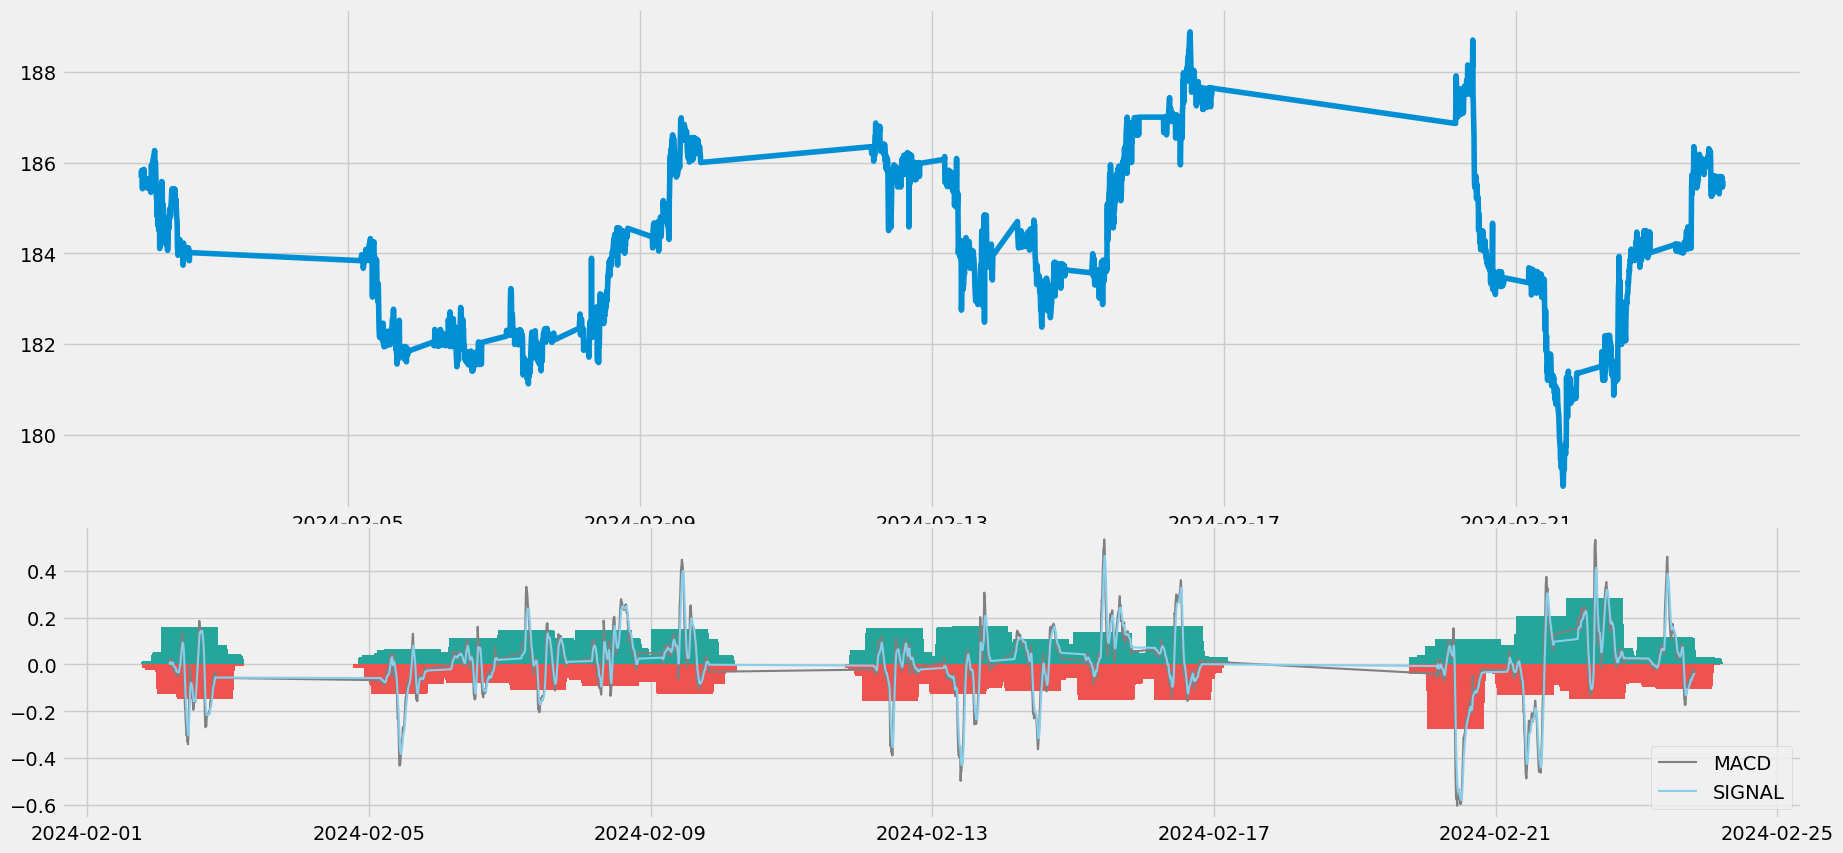

In [8]:
def plot_macd(prices, macd, signal, hist):
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

    ax1.plot(prices)
    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'lower right')

plot_macd(ibm['close'], ibm_macd['macd'], ibm_macd['signal'], ibm_macd['hist'])


In [9]:
def implement_macd_strategy(prices, data):    
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    for i in range(len(data)):
        if data['macd'][i] > data['signal'][i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        elif data['macd'][i] < data['signal'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)
            
    return buy_price, sell_price, macd_signal
            
buy_price, sell_price, macd_signal = implement_macd_strategy(ibm['close'], ibm_macd)

C:\Users\hyss\AppData\Local\Temp\ipykernel_18768\57087036.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['macd'][i] > data['signal'][i]:
C:\Users\hyss\AppData\Local\Temp\ipykernel_18768\57087036.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif data['macd'][i] < data['signal'][i]:
C:\Users\hyss\AppData\Local\Temp\ipykernel_18768\57087036.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  buy_price.append(price

C:\Users\hyss\AppData\Local\Temp\ipykernel_18768\4012175669.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if str(ibm_macd['hist'][i])[0] == '-':
C:\Users\hyss\AppData\Local\Temp\ipykernel_18768\4012175669.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.bar(ibm_macd.index[i], ibm_macd['hist'][i], color = '#26a69a')
C:\Users\hyss\AppData\Local\Temp\ipykernel_18768\4012175669.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc

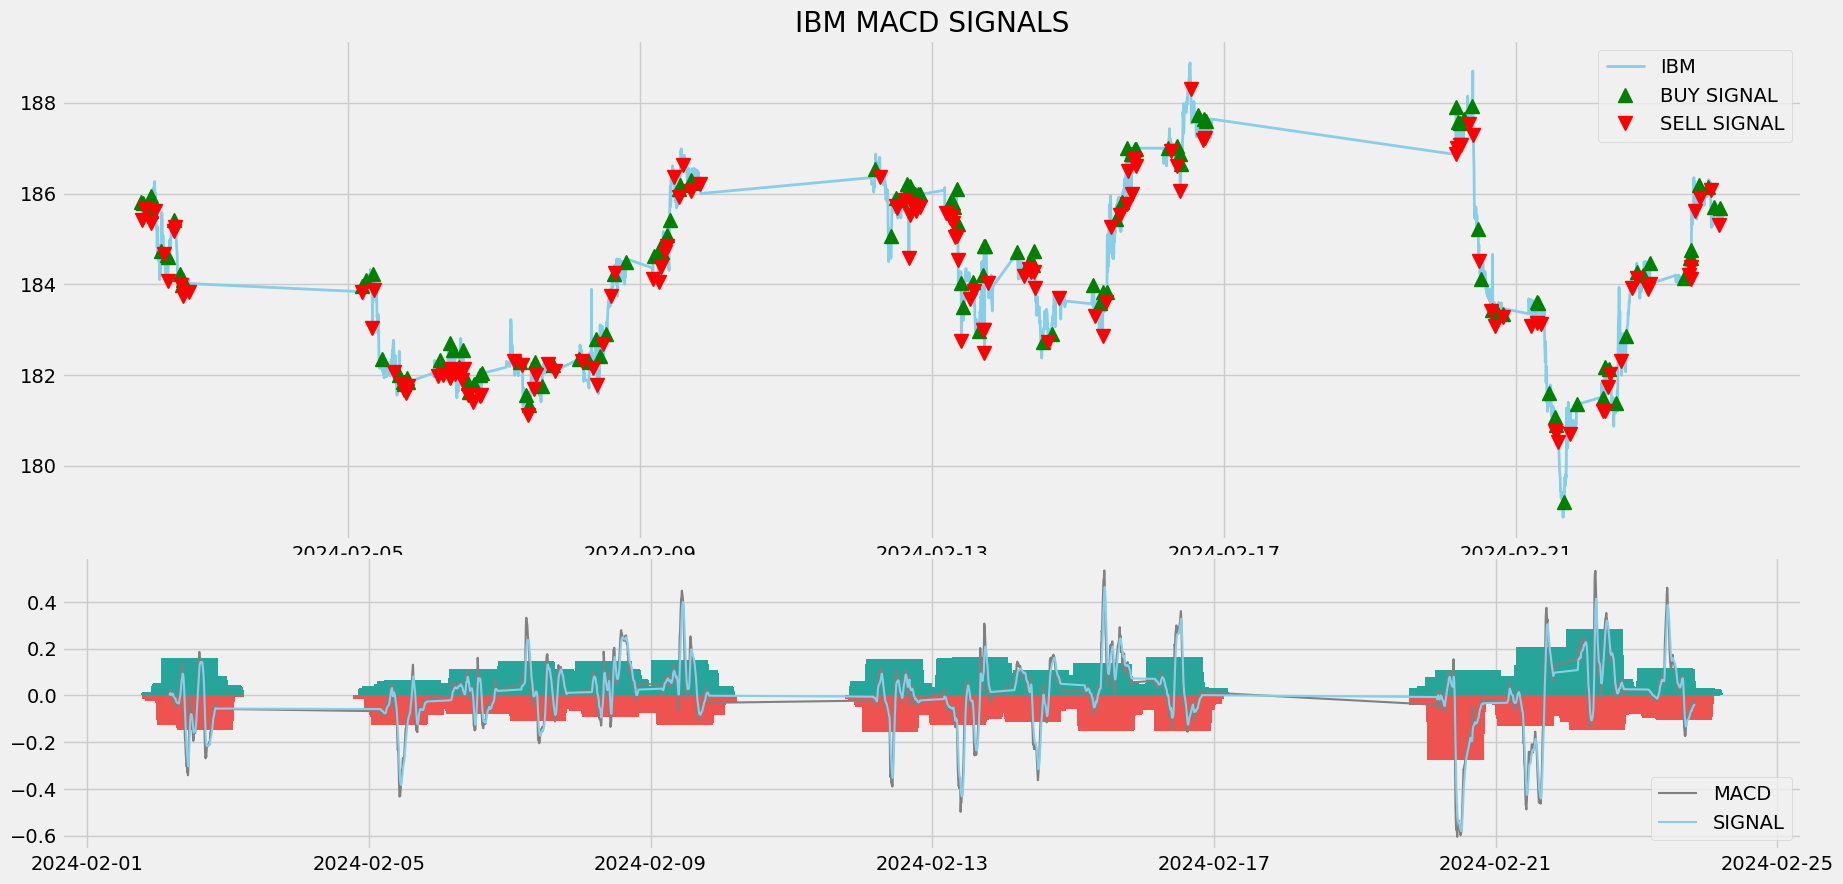

In [10]:
ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

ax1.plot(ibm['close'], color = 'skyblue', linewidth = 2, label = 'IBM')
ax1.plot(ibm.index, buy_price, marker = '^', color = 'green', markersize = 10, label = 'BUY SIGNAL', linewidth = 0)
ax1.plot(ibm.index, sell_price, marker = 'v', color = 'r', markersize = 10, label = 'SELL SIGNAL', linewidth = 0)
ax1.legend()
ax1.set_title('IBM MACD SIGNALS')
ax2.plot(ibm_macd['macd'], color = 'grey', linewidth = 1.5, label = 'MACD')
ax2.plot(ibm_macd['signal'], color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

for i in range(len(ibm_macd)):
    if str(ibm_macd['hist'][i])[0] == '-':
        ax2.bar(ibm_macd.index[i], ibm_macd['hist'][i], color = '#ef5350')
    else:
        ax2.bar(ibm_macd.index[i], ibm_macd['hist'][i], color = '#26a69a')
        
plt.legend(loc = 'lower right')
plt.show()

In [11]:
position = []
for i in range(len(macd_signal)):
    if macd_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(ibm['close'])):
    if macd_signal[i] == 1:
        position[i] = 1
    elif macd_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
macd = ibm_macd['macd']
signal = ibm_macd['signal']
close_price = ibm['close']
macd_signal = pd.DataFrame(macd_signal).rename(columns = {0:'macd_signal'}).set_index(ibm.index)
position = pd.DataFrame(position).rename(columns = {0:'macd_position'}).set_index(ibm.index)

frames = [close_price, macd, signal, macd_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy

,close,macd,signal,macd_signal,macd_position
2024-02-02 04:00:00,185.670,0.000000,0.000000,0,1
2024-02-02 04:05:00,185.809,0.011088,0.002218,1,1
2024-02-02 04:10:00,185.759,0.015661,0.004906,0,1
2024-02-02 04:15:00,185.828,0.024569,0.008839,0,1
2024-02-02 04:20:00,185.660,0.017867,0.010644,0,1
...,...,...,...,...,...
2024-02-23 19:10:00,185.690,-0.024657,-0.051790,0,1
2024-02-23 19:20:00,185.460,-0.033032,-0.048039,0,1
2024-02-23 19:30:00,185.690,-0.020870,-0.042605,0,1
2024-02-23 19:45:00,185.460,-0.029451,-0.039974,0,1


In [12]:
ibm_ret = pd.DataFrame(np.diff(ibm['close'])).rename(columns = {0:'returns'})
macd_strategy_ret = []

for i in range(len(ibm_ret)):
    try:
        returns = ibm_ret['returns'][i]*strategy['macd_position'][i]
        macd_strategy_ret.append(returns)
    except:
        pass
    
macd_strategy_ret_df = pd.DataFrame(macd_strategy_ret).rename(columns = {0:'macd_returns'})

investment_value = 100000
number_of_stocks = floor(investment_value/ibm['close'][0])
macd_investment_ret = []

for i in range(len(macd_strategy_ret_df['macd_returns'])):
    returns = number_of_stocks*macd_strategy_ret_df['macd_returns'][i]
    macd_investment_ret.append(returns)

macd_investment_ret_df = pd.DataFrame(macd_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(macd_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)
print(cl('Profit gained from the MACD strategy by investing $100k in IBM : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the MACD strategy : {}%'.format(profit_percentage), attrs = ['bold']))


Profit gained from the MACD strategy by investing $100k in IBM : -17230.53
Profit percentage of the MACD strategy : -18%


C:\Users\hyss\AppData\Local\Temp\ipykernel_18768\18757607.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  returns = ibm_ret['returns'][i]*strategy['macd_position'][i]
C:\Users\hyss\AppData\Local\Temp\ipykernel_18768\18757607.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  number_of_stocks = floor(investment_value/ibm['close'][0])


In [13]:
def get_benchmark(start_date, investment_value):
    spy = get_historical_data('SPY', start_date)['close']
    benchmark = pd.DataFrame(np.diff(spy)).rename(columns = {0:'benchmark_returns'})
    
    investment_value = investment_value
    number_of_stocks = floor(investment_value/spy[0])
    benchmark_investment_ret = []
    
    for i in range(len(benchmark['benchmark_returns'])):
        returns = number_of_stocks*benchmark['benchmark_returns'][i]
        benchmark_investment_ret.append(returns)

    benchmark_investment_ret_df = pd.DataFrame(benchmark_investment_ret).rename(columns = {0:'investment_returns'})
    return benchmark_investment_ret_df

benchmark = get_benchmark('2020-01-01', 100000)

investment_value = 100000
total_benchmark_investment_ret = round(sum(benchmark['investment_returns']), 2)
benchmark_profit_percentage = floor((total_benchmark_investment_ret / investment_value) * 100)
print(cl('Benchmark profit by investing $100k: {}'.format(total_benchmark_investment_ret), attrs=['bold']))
print(cl('MACD Strategy profit is {}% higher than the Benchmark Profit'.format(profit_percentage - benchmark_profit_percentage), attrs=['bold']))
print(cl('MACD Strategy profit is {}% higher than the Benchmark Profit'.format(profit_percentage - benchmark_profit_percentage), attrs=['bold']))


Benchmark profit by investing $100k: -37.66
MACD Strategy profit is -17% higher than the Benchmark Profit
MACD Strategy profit is -17% higher than the Benchmark Profit


C:\Users\hyss\AppData\Local\Temp\ipykernel_18768\12501125.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  number_of_stocks = floor(investment_value/spy[0])
